**Zulkifli Yasin Hidayatulloh**

Belajar Pengembangan Machine Learning

Data yang digunakan:
https://www.kaggle.com/cornflake15/denpasarbalihistoricalweatherdata

**Persiapan Data**

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"zulkifliyasin","key":"fc6fa59adff690439feb00d5ec4786c0"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
#download dataset
!kaggle datasets download -d cornflake15/denpasarbalihistoricalweatherdata

denpasarbalihistoricalweatherdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#unzip and save to dir
!mkdir weather
!unzip denpasarbalihistoricalweatherdata.zip -d weather
!ls weather

mkdir: cannot create directory ‘weather’: File exists
Archive:  denpasarbalihistoricalweatherdata.zip
replace weather/openweatherdata-denpasar-1990-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: weather/openweatherdata-denpasar-1990-2020.csv  
replace weather/openweatherdata-denpasar-1990-2020v0.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: weather/openweatherdata-denpasar-1990-2020v0.1.csv  
openweatherdata-denpasar-1990-2020.csv
openweatherdata-denpasar-1990-2020v0.1.csv


In [6]:
import pandas as pd
#read data
df = pd.read_csv('weather/openweatherdata-denpasar-1990-2020v0.1.csv')
df

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264919,1/7/2020 19:00,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,4.10,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264920,1/7/2020 20:00,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,5.70,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264921,1/7/2020 21:00,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,83,6.70,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264922,1/7/2020 22:00,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,83,6.20,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [7]:
#mengecek data kosong
df.isna().sum()

dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [8]:
#manipulasi date dan time
df.dt_iso=pd.to_datetime(df.dt_iso)
#memilih data date dan wind speed
df = df[['dt_iso','wind_speed']]
df

,dt_iso,wind_speed
0,1990-01-01 00:00:00,1.36
1,1990-01-01 01:00:00,2.09
2,1990-01-01 02:00:00,2.44
3,1990-01-01 03:00:00,2.29
4,1990-01-01 04:00:00,1.71
...,...,...
264919,2020-01-07 19:00:00,4.10
264920,2020-01-07 20:00:00,5.70
264921,2020-01-07 21:00:00,6.70
264922,2020-01-07 22:00:00,6.20


In [9]:
#manipulasi date
df = df.copy()
df['date'] = df.dt_iso.dt.date
df = df.drop('dt_iso',axis=1)
df = df[['date','wind_speed']]
df

,date,wind_speed
0,1990-01-01,1.36
1,1990-01-01,2.09
2,1990-01-01,2.44
3,1990-01-01,2.29
4,1990-01-01,1.71
...,...,...
264919,2020-01-07,4.10
264920,2020-01-07,5.70
264921,2020-01-07,6.70
264922,2020-01-07,6.20


In [10]:
#memilih data dari tahun 2010 hingga 2020
df = df.copy()
df.date = pd.to_datetime(df.date)
get_data = (df.date > '2010-01-01') & (df.date <= '2020-01-01')
df = df.loc[get_data]
df

,date,wind_speed
176232,2010-01-02,3.1
176233,2010-01-02,3.1
176234,2010-01-02,5.1
176235,2010-01-02,5.1
176236,2010-01-02,5.7
...,...,...
264775,2020-01-01,1.5
264776,2020-01-01,1.0
264777,2020-01-01,1.5
264778,2020-01-01,1.5


In [11]:
#cek shape data
df.shape

(88548, 2)

In [12]:
#mereset index dataframe
df.index = pd.RangeIndex(start=0, stop=88548, step=1)
df

,date,wind_speed
0,2010-01-02,3.1
1,2010-01-02,3.1
2,2010-01-02,5.1
3,2010-01-02,5.1
4,2010-01-02,5.7
...,...,...
88543,2020-01-01,1.5
88544,2020-01-01,1.0
88545,2020-01-01,1.5
88546,2020-01-01,1.5


In [13]:
#mengecek data kosong
df.isnull().sum()

date          0
wind_speed    0
dtype: int64

In [14]:
#mengecek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88548 entries, 0 to 88547
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        88548 non-null  datetime64[ns]
 1   wind_speed  88548 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [15]:
# memasukan data dalam masing2 variabel
import numpy as np

date = df.date.values
wind = df.wind_speed.values

date = np.array(date)
wind = np.array(wind)

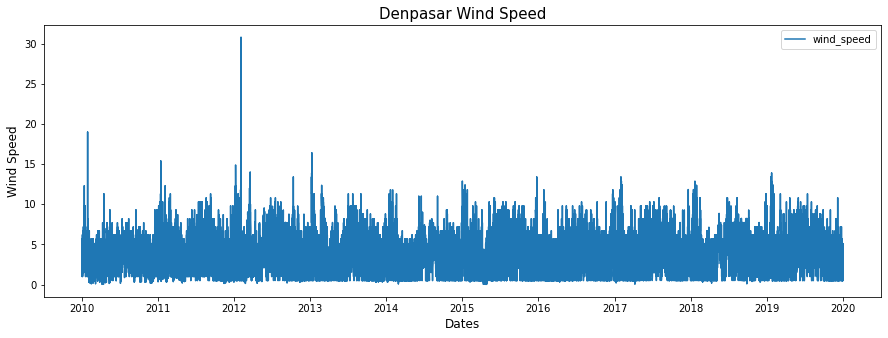

In [16]:
#plot data
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(date,wind)
plt.title('Denpasar Wind Speed',fontsize=15)
plt.ylabel('Wind Speed',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.legend(['wind_speed'], loc='upper right',fontsize=10)
plt.show()

In [17]:
# memasukan data dalam masing2 variabel
date = np.array(df.date.values, dtype=np.float)
wind = df.wind_speed.values

**Split Data**

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(wind, date, test_size=0.2, random_state=1, shuffle = False)

In [19]:
print('Data Train : ',len(x_train))
print('Data Validation : ',len(x_val))

Data Train :  70838
Data Validation :  17710


**Pemodelan Arsitektur**

In [20]:
#merubah data menjadi format yang dapat diterima oleh model
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [21]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_val, window_size=60, batch_size=200, shuffle_buffer=5000)

In [22]:
# arsitektur model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Conv1D,Lambda
model = Sequential([
    Conv1D(filters=32, kernel_size=7,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 1]),
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
    Lambda(lambda x: x * 300)])
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          256       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 120)         44640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                39168     
_________________________________________________________________
dense (Dense)                (None, 30)                1950      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0

In [23]:
# kriteria mae = 10% skala data
kriteria_mae = (wind.max() - wind.min()) * 0.1
print(kriteria_mae)

3.079


In [24]:
# penggunaan callback dengan mae < 10% skala data
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< kriteria_mae and logs.get('val_mae') < kriteria_mae):
      print("\nMAE dari model telah mencapai nilai < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [25]:
history = model.fit(train_set, epochs=20, batch_size=200, validation_data = val_set, callbacks=[callbacks])

Epoch 1/20
354/354 [==============================] - 133s 358ms/step - loss: 8.5470 - mae: 9.0464 - val_loss: 9.2182 - val_mae: 9.7182
Epoch 2/20
354/354 [==============================] - 126s 357ms/step - loss: 8.1320 - mae: 8.6317 - val_loss: 8.5812 - val_mae: 9.0811
Epoch 3/20
354/354 [==============================] - 126s 356ms/step - loss: 8.1289 - mae: 8.6287 - val_loss: 8.5680 - val_mae: 9.0679
Epoch 4/20
354/354 [==============================] - 126s 356ms/step - loss: 8.1221 - mae: 8.6218 - val_loss: 9.1787 - val_mae: 9.6786
Epoch 5/20
354/354 [==============================] - 126s 357ms/step - loss: 4.7581 - mae: 5.2379 - val_loss: 1.3568 - val_mae: 1.8071
Epoch 6/20
354/354 [==============================] - 126s 356ms/step - loss: 2.6168 - mae: 3.0817 - val_loss: 1.3793 - val_mae: 1.8279
Epoch 7/20
354/354 [==============================] - 126s 355ms/step - loss: 3.7472 - mae: 4.2332 - val_loss: 1.6029 - val_mae: 2.0520
Epoch 8/20
354/354 [============================

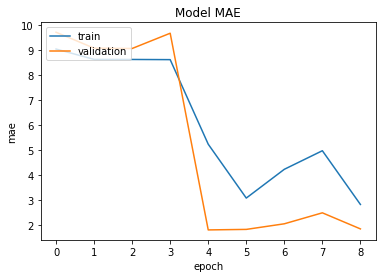

In [29]:
# plot mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

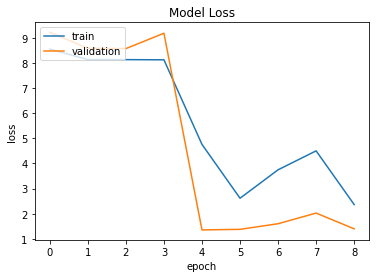

In [30]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()